<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Deadline: 2019-11-03 23:59:59</font></h2>


In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Logistic Regression Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import scipy
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# 1. Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### 1.1 Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
data_train = pd.read_csv('loan_train.csv')

In [3]:
# Understanding to dataset
# Shape
data_train.shape

(346, 10)

In [4]:
# info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


In [5]:
# head()
data_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
# tail
data_train.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [7]:
data_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [8]:
# Drop two unnamed columns
data_train = data_train.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis = 1)

In [9]:
# data head()
data_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [10]:
# describe()
data_train.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


### 1.2 Data exploration

#### 1.2.1 Determin attributive variable

1. Input: <> loan_status
2. Output: loan_status
3. Type of variable:
    + Pridictor: <> loan_status
    + Target: loan_status
4. Data type:
    + Datetime
    + Numeric
5. Variable Categoy:

In [11]:
# Check types of variable
# Numeric variable
number = [f for f in data_train.columns if data_train.dtypes[f] != 'object']
number

['Principal', 'terms', 'age']

In [12]:
# Object variable
objects = [f for f in data_train.columns if data_train.dtypes[f] == 'object']
objects

['loan_status', 'effective_date', 'due_date', 'education', 'Gender']

In [13]:
# Determine the number of different value of variable
# Numeric variable
i = 1
for obj in number:
    print(i,'/',obj,'\t',len(data_train[obj].unique()),':',data_train[obj].unique()) 
    i = i + 1

1 / Principal 	 5 : [1000  800  300  900  500]
2 / terms 	 3 : [30 15  7]
3 / age 	 32 : [45 33 27 28 29 36 26 39 40 32 25 34 31 37 21 30 24 35 22 50 44 43 46 38
 23 20 47 42 19 51 41 18]


In [14]:
# Numeric variable
i = 1
for obj in objects:
    print(i,'/',obj,'\t',len(data_train[obj].unique()),':',data_train[obj].unique()) 
    i = i + 1

1 / loan_status 	 2 : ['PAIDOFF' 'COLLECTION']
2 / effective_date 	 7 : ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
3 / due_date 	 23 : ['10/7/2016' '9/22/2016' '10/8/2016' '9/24/2016' '9/16/2016' '10/9/2016'
 '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016' '9/26/2016'
 '10/11/2016' '11/10/2016' '9/18/2016' '10/26/2016' '9/19/2016'
 '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016' '11/12/2016'
 '9/23/2016']
4 / education 	 4 : ['High School or Below' 'Bechalor' 'college' 'Master or Above']
5 / Gender 	 2 : ['male' 'female']


#### There are not any Nan values in dataset

### 1.3 Convert 'due_date', 'effective_date' to date time object 

In [15]:
# The type of 'due_date', 'effective_date' object
print(type(data_train.due_date[1]))
type(data_train.effective_date[1])


<class 'str'>


str

In [16]:
# Convert 'due_date', 'effective_date' to date time object
data_train.due_date = pd.to_datetime(data_train['due_date'])
data_train.effective_date = pd.to_datetime(data_train['effective_date'])

In [17]:
# Checking type of 'due_date', 'effective_date' object
type(data_train.due_date[1])
type(data_train.effective_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null datetime64[ns]
due_date          346 non-null datetime64[ns]
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.7+ KB


### 1.4 Univariate Analysis

### Numerical variable

In [19]:
# Age
data_train['age'].describe(include = 'all')

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [20]:
age_median = data_train.age.median()
age_median

30.0

In [21]:
age_mode = data_train.age.mode()
age_mode

0    26
dtype: int64

In [22]:
# check min, max co thuoc (mean - 3*std, mean + 3*std) or mean co thuoc 10% median
data_train.age.mean()-3*data_train.age.std(), data_train.age.mean()+3*data_train.age.std()  

(12.821053179173088, 49.057559537589924)

In [23]:
# Q1,Q3
Q1_age = np.percentile(data_train.age,25)
Q3_age = np.percentile(data_train.age,75)
Q1_age, Q3_age

(27.0, 35.0)

In [24]:
age_iqr = scipy.stats.iqr(data_train.age)
age_iqr

8.0

In [25]:
age_var = data_train.age.var()
age_var

36.47456647398844

In [26]:
age_std = data_train.age.std()
age_std

6.039417726402806

In [27]:
age_skew = data_train.age.skew()
age_skew
# Phân phối lệch phải rất ít

0.700410003463071

In [28]:
scipy.stats.skew(data_train.age)

0.6973698798726947

In [29]:
prin_kur = data_train.age.kurtosis()
prin_kur
# Phân phối nhọn hơn phân phối chuẩn

0.4810630956818449

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


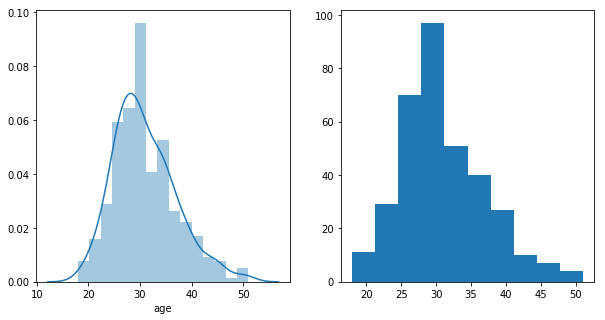

In [30]:
# Visuallization
# Histogram
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(data_train.age)
plt.subplot(1,2,2)
plt.hist(data_train.age)
plt.show()

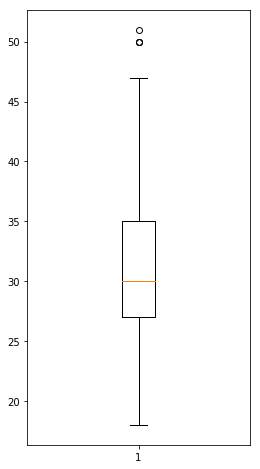

In [31]:
# Boxplot
plt.figure(figsize=(4,8))
plt.boxplot(data_train.age)
plt.show()

In [32]:
# number of upper outliers
n_o_upper = data_train[data_train.age > (Q3_age+1.3* age_iqr)].shape[0]
n_o_upper

7

In [33]:
# Percentage od outliers
outlier_per_age = n_o_upper/data_train.shape[0]
outlier_per_age

0.02023121387283237

In [34]:
from scipy.stats import zscore
data_train["age_zscore"] = zscore(data_train["age"])
data_train["is_outlier"] = data_train["age_zscore"].apply(lambda x: x <= -3 or x >= 3)
data_train[data_train["is_outlier"]]

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_zscore,is_outlier
41,PAIDOFF,800,15,2016-09-11,2016-09-25,50,High School or Below,male,3.160619,True
184,PAIDOFF,1000,15,2016-09-12,2016-09-26,50,High School or Below,male,3.160619,True
223,PAIDOFF,800,15,2016-09-13,2016-09-27,51,college,male,3.326438,True
293,COLLECTION,1000,15,2016-09-11,2016-09-25,50,Master or Above,male,3.160619,True


In [35]:
data_train.age.shape[0]

346

In [36]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    return result.tolist()

In [37]:
len(removeOutliers(data_train.age,1.5))

342

In [38]:
def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    oa = Q3 +  1.37*IQR
    ob = Q1 -  1.37*IQR
    return col[(col > ob) & (col < oa)]

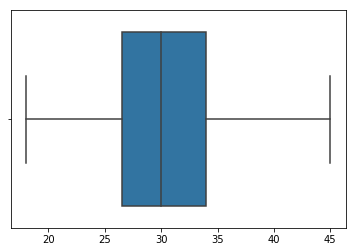

In [39]:
age_clean = removeOutliers(data_train.age, 1.3)
sns.boxplot(age_clean)

In [40]:
# Effective_day
data_train["effective_date"].describe(include=all)

count                     346
unique                      7
top       2016-09-11 00:00:00
freq                      166
first     2016-09-08 00:00:00
last      2016-09-14 00:00:00
Name: effective_date, dtype: object

In [41]:
data_train["effective_date"].mode() 

0   2016-09-11
dtype: datetime64[ns]

In [42]:
np.array(data_train["effective_date"]).ptp()

numpy.timedelta64(518400000000000,'ns')

In [43]:
# Term
data_train['terms'].describe(include = 'all')

count    346.000000
mean      22.653179
std        7.991006
min        7.000000
25%       15.000000
50%       30.000000
75%       30.000000
max       30.000000
Name: terms, dtype: float64

### Categorical Variable

+ loan_status
+ education
+ Gender

### Principal

In [44]:
# Principal

prin_count = data_train["Principal"].value_counts(dropna=False)
prin_count

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

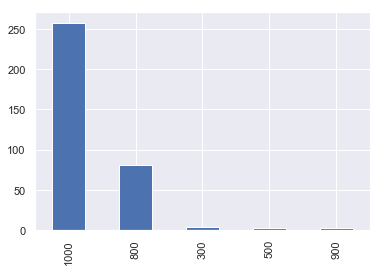

In [45]:
sns.set()
prin_count.plot.bar()

### loan_status

In [46]:
# loan_status
loan_status_count = data_train.groupby('loan_status').size()
loan_status_count

loan_status
COLLECTION     86
PAIDOFF       260
dtype: int64

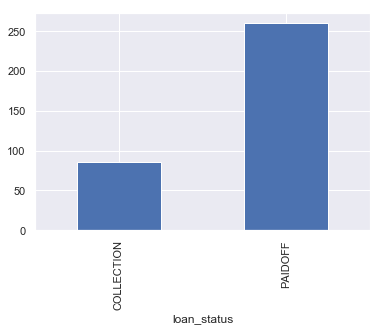

In [47]:
sns.set()
loan_status_count.plot.bar()

### education

In [48]:
# education
education_count = data_train.groupby('education').size()
education_count

education
Bechalor                 44
High School or Below    151
Master or Above           2
college                 149
dtype: int64

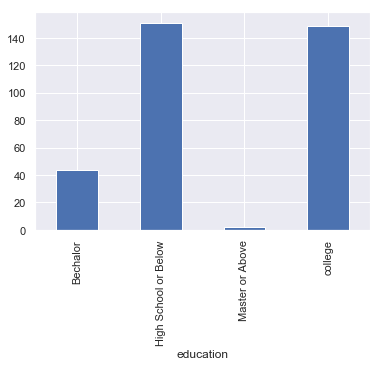

In [49]:
sns.set()
education_count.plot.bar()

### Gender

In [50]:
# Gender
gender_count = data_train.groupby('Gender').size()
gender_count

Gender
female     52
male      294
dtype: int64

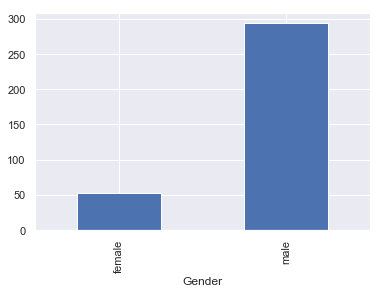

In [51]:
sns.set()
gender_count.plot.bar()

### terms

In [52]:
# terms
terms_count = data_train["terms"].value_counts(dropna=False)
terms_count

30    184
15    148
7      14
Name: terms, dtype: int64

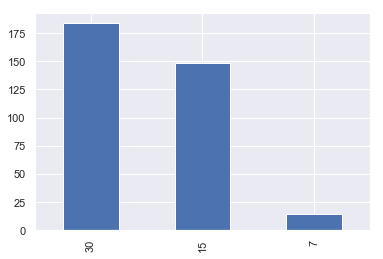

In [53]:
sns.set()
terms_count.plot.bar()

### 1.4 Bi-variate Analysis

### Continuous & Continuous

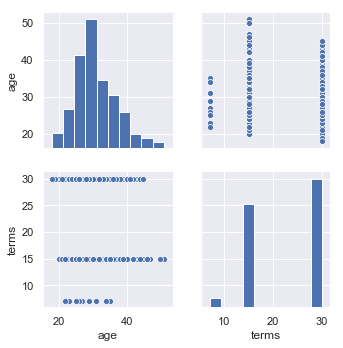

In [54]:
# Continuous & Continuous
sns.pairplot(data_train[['age','terms']])

In [55]:
# Không có quan hệ tuyến tính

### Categoricals & Categoricals

+ Gender & loan_status
+ education & loan_status
+ Principal & terms
+ Principal & Gender
+ terms & Gender

### Gender & loan_status

In [56]:
# Gender & loan_status
table_Gl = pd.crosstab(data_train['Gender'],data_train['loan_status'])
table_Gl

loan_status,COLLECTION,PAIDOFF
Gender,,
female,7,45
male,79,215


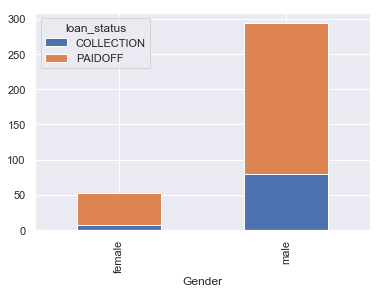

In [57]:
table_Gl.plot(kind = 'bar', stacked = True)
plt.show()

In [58]:
# Chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [59]:
# Chi-Squared Test
stat, p, dof, expect = chi2_contingency(table_Gl)
print('dof = %d' %dof)
print('p=',p)

dof = 1
p= 0.05897396665179579


In [60]:
# interpret test-statistic
prob_gl = 0.95
critical_gl = chi2.ppf(prob_gl,dof)
print('probability = %.3f, critical = %.3f, stat_gl = %.3f' % (prob_gl,critical_gl,stat))

probability = 0.950, critical = 3.841, stat_gl = 3.566


In [61]:
# interpret p-value
alpha_gl = 1 - prob_gl
print('significance = %.3f, p = %.3f'%(alpha_gl,p))
if p <= alpha_gl:
    print('Dependent')
else:
    print('Indepent')

significance = 0.050, p = 0.059
Indepent


### education & loan_status

In [62]:
# education 
table_El = pd.crosstab(data_train['education'],data_train['loan_status'])
table_El

loan_status,COLLECTION,PAIDOFF
education,,
Bechalor,11,33
High School or Below,39,112
Master or Above,1,1
college,35,114


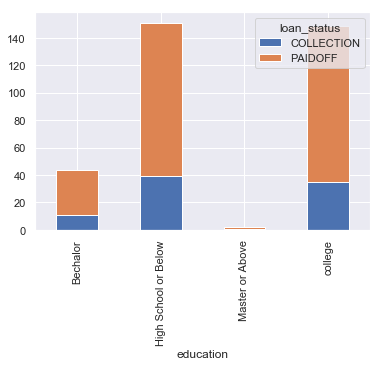

In [63]:
table_El.plot(kind = 'bar', stacked = True)
plt.show()

In [64]:
# Chi-Squared Test
stat, p, dof, expect = chi2_contingency(table_El)
print('dof = %d' %dof)
print('p=',p)

dof = 3
p= 0.8247768037862694


In [65]:
# interpret test-statistic
prob_el = 0.95
critical_el = chi2.ppf(prob_el,dof)
print('probability = %.3f, critical = %.3f, stat_gl = %.3f' % (prob_el,critical_el,stat))

probability = 0.950, critical = 7.815, stat_gl = 0.903


In [66]:
# interpret p-value
alpha_el = 1 - prob_el
print('significance = %.3f, p = %.3f'%(alpha_el,p))
if p <= alpha_el:
    print('Dependent')
else:
    print('Indepent')


significance = 0.050, p = 0.825
Indepent


### Principal & terms

In [67]:
table_PT = pd.crosstab(data_train["Principal"], data_train["terms"])
table_PT

terms,7,15,30
Principal,,,
300,3,0,0
500,1,1,0
800,1,75,5
900,1,1,0
1000,8,71,179


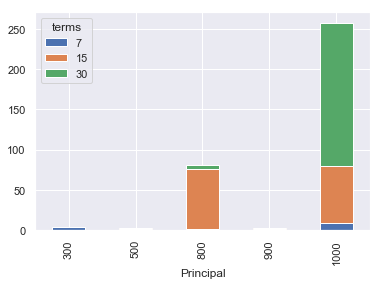

In [68]:
table_PT.plot(kind = "bar", stacked = True)

In [69]:
#Chi-Square Test
stat, p, dof, expected = chi2_contingency(table_PT)
print("dot=%d" %dof)
print("p=", p)

dot=8
p= 1.0252490708763963e-39


In [70]:
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob,dof)
print("probability=%.3f, critical=%.3f, stat =%.3f" %(prob, critical,stat))

probability=0.950, critical=15.507, stat =203.771


In [71]:
#interpret p-value
alpha = 1.0-prob
print("significance = %.3f, p= %.3f" %(alpha,p))
if p<alpha:
    print("Dependent(reject H0)")
else:
    print("Independent(fail to reject H0)")

significance = 0.050, p= 0.000
Dependent(reject H0)


In [72]:
# Nhận xét: 2 biến term và principal có mối quan hệ với nhau

### Principal & Gender

In [73]:
table_PG = pd.crosstab(data_train["Principal"], data_train["Gender"])
table_PG

Gender,female,male
Principal,,
300,0,3
500,1,1
800,12,69
900,1,1
1000,38,220


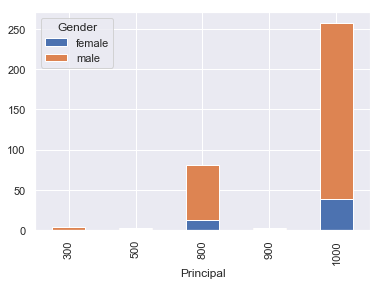

In [74]:
table_PG.plot(kind = "bar", stacked = True)

In [75]:
#Chi-Square Test
stat, p, dof, expected = chi2_contingency(table_PG)
print("dot=%d" %dof)
print("p=", p)

dot=4
p= 0.35671479250105864


In [76]:
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob,dof)
print("probability=%.3f, critical=%.3f, stat =%.3f" %(prob, critical,stat))
#interpret p-value
alpha = 1.0-prob
print("significance = %.3f, p= %.3f" %(alpha,p))
if p<alpha:
    print("Dependent(reject H0)")
else:
    print("Independent(fail to reject H0)")

probability=0.950, critical=9.488, stat =4.382
significance = 0.050, p= 0.357
Independent(fail to reject H0)


In [77]:
# Nhận xét: hai biến độc không có mối quan hệ với nhau

### terms & Gender

In [78]:
table_TC = pd.crosstab(data_train["Principal"], data_train["Gender"])
table_TC

Gender,female,male
Principal,,
300,0,3
500,1,1
800,12,69
900,1,1
1000,38,220


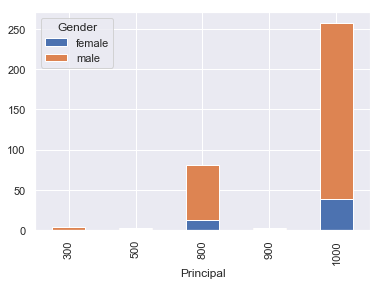

In [79]:
table_TC.plot(kind = "bar", stacked = True)

In [80]:
#Chi-Square Test
stat, p, dof, expected = chi2_contingency(table_TC)
print("dot=%d" %dof)
print("p=", p)

dot=4
p= 0.35671479250105864


In [81]:
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob,dof)
print("probability=%.3f, critical=%.3f, stat =%.3f" %(prob, critical,stat))
#interpret p-value
alpha = 1.0-prob
print("significance = %.3f, p= %.3f" %(alpha,p))
if p<alpha:
    print("Dependent(reject H0)")
else:
    print("Independent(fail to reject H0)")

probability=0.950, critical=9.488, stat =4.382
significance = 0.050, p= 0.357
Independent(fail to reject H0)


In [82]:
# Nhận xét: hai biến không có quan hệ với nhau

In [83]:
data_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_zscore,is_outlier
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2.331526,False
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,0.341701,False
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,-0.653211,False
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,-0.487392,False
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,-0.321573,False


In [84]:
data_train.isnull().sum() # Khong co du lieu thieu

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
age_zscore        0
is_outlier        0
dtype: int64

### 1.5 Handle the Missing Values and Outlier Values

+ Phần xử lý ngoại lệ đã thực hiện ở trên

# 2. Data visualization

How many sample of each class is in our data set?

In [85]:
# code
status_count = data_train[['loan_status','education','Gender']].groupby(['loan_status']).count()

In [86]:
status_count

,education,Gender
loan_status,,
COLLECTION,86,86
PAIDOFF,260,260


**260** people have paid off the loan on time while **86** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [87]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

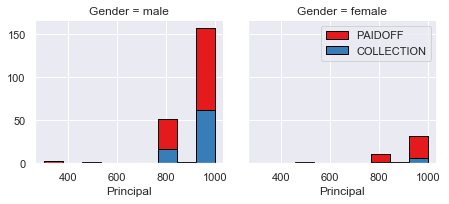

In [88]:
# plt.figure(figsize = (20,20))
# sns.set(style="ticks")
bins = np.linspace(data_train.Principal.min(),data_train.Principal.max(),10)
g_prin = sns.FacetGrid(data_train, col = 'Gender', hue = 'loan_status', palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_prin.map(plt.hist,'Principal', edgecolor="black", bins = bins)
g_prin.axes[-1].legend()
plt.show()

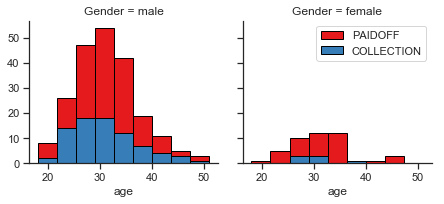

In [89]:
# code here
bins = np.linspace(data_train.age.min(),data_train.age.max(),10)
sns.set(style="ticks")
g_age = sns.FacetGrid(data_train, col = 'Gender', hue = 'loan_status',palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_age.map(plt.hist,'age', bins = bins, edgecolor="black")
plt.legend( ('COLLECTION', 'PAYOFF'))
g_age.axes[-1].legend()
#fig.tight_layout()
plt.show()

# 3. Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [90]:
# Make new column 'dayofweek' from 'effective_date'
import datetime as dt
data_train['dayofweek'] = data_train.effective_date.dt.dayofweek
data_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_zscore,is_outlier,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2.331526,False,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,0.341701,False,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,-0.653211,False,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,-0.487392,False,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,-0.321573,False,4


Lets plot some columns to underestand data better:

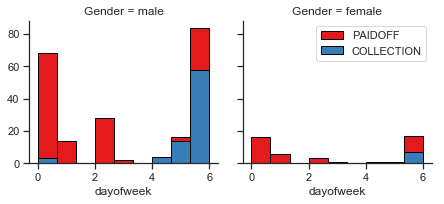

In [91]:
# code here
bins = np.linspace(data_train.dayofweek.min(),data_train.dayofweek.max(),10)
sns.set(style="ticks")
g_day = sns.FacetGrid(data_train, col = 'Gender', hue = 'loan_status',palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_day.map(plt.hist,'dayofweek',bins= bins, edgecolor="black")
plt.legend( ('COLLECTION', 'PAYOFF'))
g_day.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [92]:
# code here
# length = data_train.shape[0]
# data_train['weekend'] = 0
# for i in range(length):
#     if data_train['dayofweek'][i]>3:
#         data_train['weekend'][i] = 1
#     else:
#         data_train['weekend'][i] = 0


data_train['weekend'] = np.where(data_train.dayofweek > 3,1,0)
data_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_zscore,is_outlier,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2.331526,False,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,0.341701,False,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,-0.653211,False,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,-0.487392,False,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,-0.321573,False,4,1


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [93]:
# code here
data_train[['loan_status','Gender']].groupby(['Gender','loan_status']).size()

Gender  loan_status
female  COLLECTION       7
        PAIDOFF         45
male    COLLECTION      79
        PAIDOFF        215
dtype: int64

In [94]:
percen_paidoff_female = (45/(45+7))*100
percen_paidoff_male = (215/(215+79))*100
print(percen_paidoff_female, percen_paidoff_male)

86.53846153846155 73.12925170068027


**86.54** % of female pay there loans while only **73.13** % of males pay there loan

Lets convert male to 0 and female to 1:


In [95]:
# code here
data_train['Gender']= data_train['Gender'].replace(['male','female'],[0,1])

In [96]:
data_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_zscore,is_outlier,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,2.331526,False,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,0.341701,False,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,-0.653211,False,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,-0.487392,False,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,-0.321573,False,4,1


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [97]:
# code here
data_train[['loan_status','education']].groupby(['education','loan_status']).size()

education             loan_status
Bechalor              COLLECTION      11
                      PAIDOFF         33
High School or Below  COLLECTION      39
                      PAIDOFF        112
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               COLLECTION      35
                      PAIDOFF        114
dtype: int64

#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [98]:
# code here
data_train[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [99]:
# code here
df_train_sub = data_train[['Principal','terms','age','Gender','weekend', 'education']]

In [100]:
df_train_sub.head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college


In [101]:
df_train_one_hot = pd.get_dummies(df_train_sub, columns = ['education'],prefix='edu')

In [102]:
df_train_one_hot = df_train_one_hot.drop(['edu_Master or Above'],axis = 1)

In [103]:
df_train_one_hot.head()

,Principal,terms,age,Gender,weekend,edu_Bechalor,edu_High School or Below,edu_college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [104]:
# code here

In [105]:
X = data_train[["Principal", "terms", "age", "Gender", "effective_date"]]
X.head()

,Principal,terms,age,Gender,effective_date
0,1000,30,45,0,2016-09-08
1,1000,30,33,1,2016-09-08
2,1000,15,27,0,2016-09-08
3,1000,30,28,1,2016-09-09
4,1000,30,29,0,2016-09-09


In [106]:
Y = data_train[['loan_status']]
Y.head()

,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


What are our lables?
- y is output, y = 'loan_status' column

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [107]:
# Du lieu cot can duoc chuan hoa?
print("The variance of the Principal:", data_train["Principal"].var())
print("The variance of the terms:", data_train["terms"].var())
print("The variance of the age:", data_train["age"].var())

The variance of the Principal: 11973.946552735193
The variance of the terms: 63.85617826924688
The variance of the age: 36.47456647398844


In [108]:
data_train.Principal.skew(), data_train.age.skew(), data_train.terms.skew()

(-2.600235671644776, 0.700410003463071, -0.2689396361830413)

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


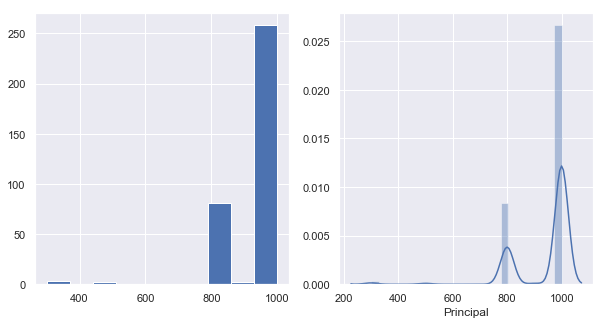

In [109]:
sns.set()
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(data_train.Principal)
plt.subplot(1,2,2)
sns.distplot(data_train.Principal)
plt.show()

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


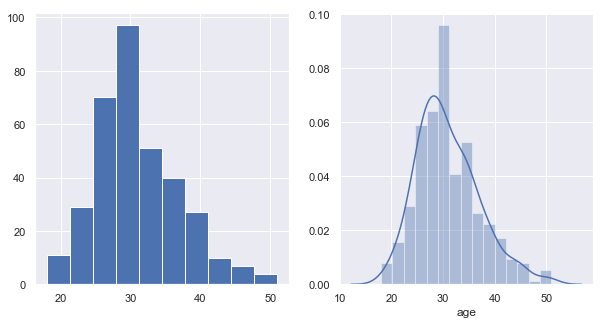

In [110]:
sns.set()
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(data_train.age)
plt.subplot(1,2,2)
sns.distplot(data_train.age)
plt.show()

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


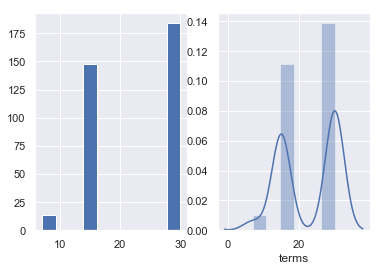

In [111]:
plt.subplot(1,2,1)
plt.hist(data_train.terms)
plt.subplot(1,2,2)
sns.distplot(data_train.terms)
plt.show()

In [112]:
data_train.Principal.ptp(), data_train.terms.ptp(), data_train.age.ptp()

c:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  """Entry point for launching an IPython kernel.


(700, 23, 33)

In [113]:
# Có khoảng cách lớn giữa max và min
# thang đo của 3 cột là khác nhau

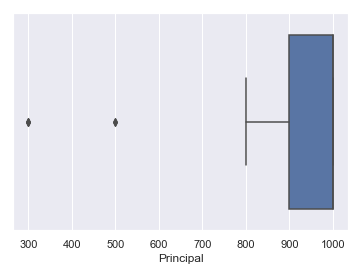

In [114]:
sns.boxplot(data_train.Principal)

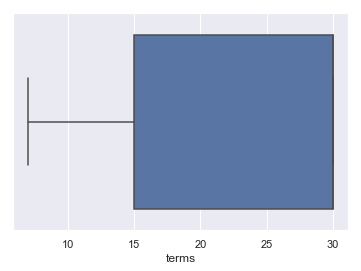

In [115]:
sns.boxplot(data_train.terms)

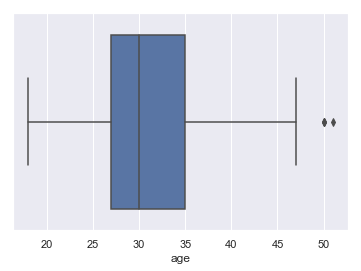

In [116]:
sns.boxplot(data_train.age)

In [117]:
from sklearn import preprocessing

In [118]:
Principal_terms_age = data_train[["Principal", "age", "terms","Gender"]]
scaler = preprocessing.RobustScaler()
robust_scaler = scaler.fit_transform(Principal_terms_age)
data_new = pd.DataFrame(robust_scaler,columns = ['Principal_scaler', 'age_scaler','terms_scaler','Gender_scaler'])
data_new.head()

,Principal_scaler,age_scaler,terms_scaler,Gender_scaler
0,0.0,1.875,0.0,0.0
1,0.0,0.375,0.0,1.0
2,0.0,-0.375,-1.0,0.0
3,0.0,-0.250,0.0,1.0
4,0.0,-0.125,0.0,0.0


In [119]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 4 columns):
Principal_scaler    346 non-null float64
age_scaler          346 non-null float64
terms_scaler        346 non-null float64
Gender_scaler       346 non-null float64
dtypes: float64(4)
memory usage: 10.9 KB


In [120]:
X['Principal_scaler'] = data_new.Principal_scaler.values
X['age_scaler'] = data_new.age_scaler.values
X['terms_scaler'] = data_new.terms_scaler.values
X['Gender'] = data_new.Gender_scaler.values
X.head()

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,Principal,terms,age,Gender,effective_date,Principal_scaler,age_scaler,terms_scaler
0,1000,30,45,0.0,2016-09-08,0.0,1.875,0.0
1,1000,30,33,1.0,2016-09-08,0.0,0.375,0.0
2,1000,15,27,0.0,2016-09-08,0.0,-0.375,-1.0
3,1000,30,28,1.0,2016-09-09,0.0,-0.250,0.0
4,1000,30,29,0.0,2016-09-09,0.0,-0.125,0.0


In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
Principal           346 non-null int64
terms               346 non-null int64
age                 346 non-null int64
Gender              346 non-null float64
effective_date      346 non-null datetime64[ns]
Principal_scaler    346 non-null float64
age_scaler          346 non-null float64
terms_scaler        346 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 21.7 KB


c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


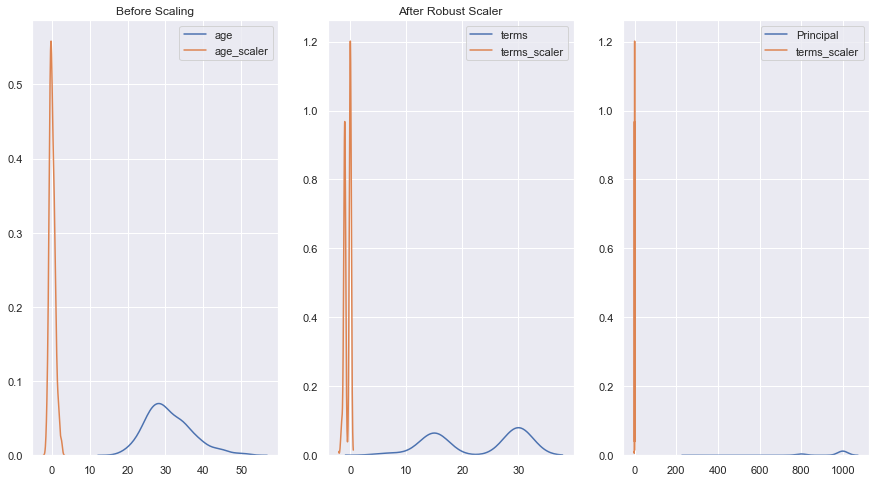

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(15,8))
ax1.set_title("Before Scaling")
sns.kdeplot(X['age'], ax=ax1)
sns.kdeplot(X['terms'], ax=ax2)
sns.kdeplot(X['Principal'], ax=ax3)


ax2.set_title("After Robust Scaler")
sns.kdeplot(X['age_scaler'], ax=ax1)
sns.kdeplot(X['terms_scaler'], ax=ax2)
sns.kdeplot(X['terms_scaler'], ax=ax3)

# 4. Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# 5. Logistic Regression

In [123]:
X = X[["Principal_scaler", "age_scaler", "terms_scaler", "Gender"]]
X.head()

,Principal_scaler,age_scaler,terms_scaler,Gender
0,0.0,1.875,0.0,0.0
1,0.0,0.375,0.0,1.0
2,0.0,-0.375,-1.0,0.0
3,0.0,-0.250,0.0,1.0
4,0.0,-0.125,0.0,0.0


In [124]:
Y.head()

,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
model.intercept_

array([0.70320784])

In [137]:
model.coef_

array([[-0.06546826, -0.05058385, -0.35310108,  0.64579563]])

In [138]:
#traning score
model.score(X_train,y_train)

0.7318840579710145

In [139]:
#Testing score
model.score(X_test, y_test)

0.8285714285714286

In [160]:
y_o_pred = model.predict(X_test)
accuracy_score(y_test,y_o_pred)

0.8285714285714286

# 6. Model Evaluation using Test set

In [141]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report


In [142]:
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_o_pred)
print("confusion matrix:\n", conf_matrix)

confusion matrix:
 [[ 0 12]
 [ 0 58]]


In [143]:
#Print classification report using predictions
print(classification_report(y_test, y_o_pred))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.83      1.00      0.91        58

    accuracy                           0.83        70
   macro avg       0.41      0.50      0.45        70
weighted avg       0.69      0.83      0.75        70



c:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Load Test set for evaluation 

In [144]:
# Read CSV file: loan_test.csv
# code here
data_test = pd.read_csv('loan_test.csv')
data_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [145]:
data_test = data_test.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1)
data_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [146]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(3), object(5)
memory usage: 3.5+ KB


In [147]:
data_test.describe()

,Principal,terms,age
count,54.000000,54.000000,54.000000
mean,914.814815,21.888889,31.833333
std,174.190751,8.818220,5.992920
min,300.000000,7.000000,20.000000
25%,800.000000,15.000000,28.000000
50%,1000.000000,30.000000,30.500000
75%,1000.000000,30.000000,36.000000
max,1000.000000,30.000000,50.000000


### Convert 'due_date', 'effective_date' to date time object 

In [148]:
# The type of 'due_date', 'effective_date' object
type(data_test.due_date[1])

str

In [149]:
type(data_test.effective_date[1])

str

In [150]:
# Convert 'due_date', 'effective_date' to date time object
data_test.due_date = pd.to_datetime(data_test['due_date'])
data_test.effective_date = pd.to_datetime(data_test['effective_date'])

In [151]:
# Checking type of 'due_date', 'effective_date' object
type(data_test.due_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [152]:
type(data_test.effective_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [153]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null datetime64[ns]
due_date          54 non-null datetime64[ns]
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 3.5+ KB


In [154]:
data_test['Gender'] = data_test['Gender'].map({'female': 1, 'male': 0})
data_test = data_test[["Principal", "terms", "age", "Gender"]]
data_test.head()

,Principal,terms,age,Gender
0,1000,30,50,1
1,300,7,35,0
2,1000,30,43,1
3,1000,30,26,0
4,800,15,29,0


In [155]:
from sklearn import preprocessing

In [156]:
Principal_terms_age_test = data_test[["Principal", "age", "terms","Gender"]]
scaler = preprocessing.RobustScaler()
robust_scaler = scaler.fit_transform(Principal_terms_age_test)
data_new1 = pd.DataFrame(robust_scaler,columns = ['Principal_scaler', 'age_scaler','terms_scaler','Gender_scaler'])
data_new1.head()

,Principal_scaler,age_scaler,terms_scaler,Gender_scaler
0,0.0,2.4375,0.000000,1.0
1,-3.5,0.5625,-1.533333,0.0
2,0.0,1.5625,0.000000,1.0
3,0.0,-0.5625,0.000000,0.0
4,-1.0,-0.1875,-1.000000,0.0


In [157]:
data_new1.shape

(54, 4)

In [158]:
# Model Evaluation

In [159]:
Y_hat_test_now = model.predict(data_new1)

# 7. Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | F1-score |
|--------------------|---------|----------|
| LogisticRegression | 82.85%  | 0.83     |

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>